In [1]:
from myData import *
#from Preprocess import *
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
X,y,_= get_data('diabetic_data.csv',labelEncode=False, skewness=False)
df = pd.concat([X,y], axis=1)
df.columns

raw data shape (101766, 50)
['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
processed data shape: (69973, 42)


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [3]:
pd.set_option('display.max_columns', 50)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[50-60),2,1,1,8,Cardiology,77,6,33,0,0,0,8,None,None,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Yes
1,Caucasian,Female,[50-60),3,1,1,2,Surgery-Neuro,49,1,11,0,0,0,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,Caucasian,Female,[80-90),1,3,7,4,InternalMedicine,68,2,23,0,0,0,9,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,Caucasian,Female,[80-90),1,1,7,3,InternalMedicine,46,0,20,0,0,0,9,None,>8,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,No
4,AfricanAmerican,Female,[30-40),1,1,7,5,InternalMedicine,49,0,5,0,0,0,3,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No


Text(0.5, 1.0, 'Race')

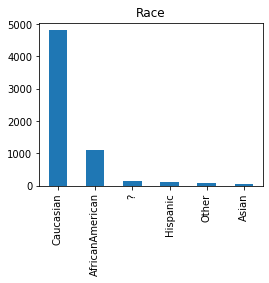

In [4]:
plt.rcParams['figure.figsize']= [4.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'race'].value_counts().plot(kind='bar')
plt.title('Race')

Text(0.5, 1.0, 'gender')

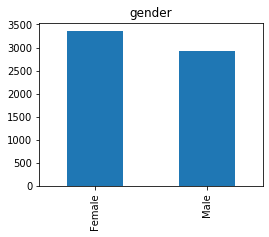

In [5]:
plt.rcParams['figure.figsize']= [4.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'gender'].value_counts().plot(kind='bar')
plt.title('gender')

Text(0.5, 1.0, 'Age')

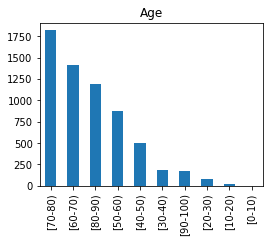

In [6]:
df.loc[df['readmitted'].isin(['1','Yes']),'age'].value_counts().plot(kind='bar')
plt.title("Age")

Text(0.5, 1.0, 'discharge_disposition_id')

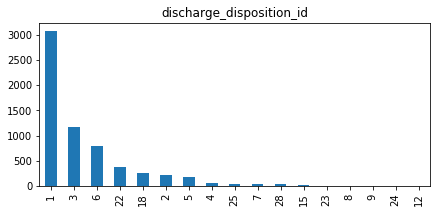

In [7]:
plt.rcParams['figure.figsize']= [7.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'discharge_disposition_id'].value_counts().plot(kind='bar')
plt.title("discharge_disposition_id")

Text(0.5, 1.0, 'admission_source_id')

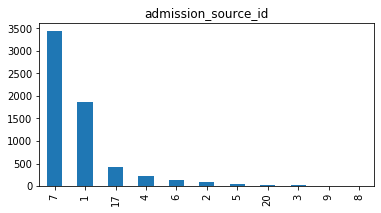

In [8]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'admission_source_id'].value_counts()[:25].plot(kind='bar')
plt.title("admission_source_id")

Text(0.5, 1.0, 'time_in_hospital')

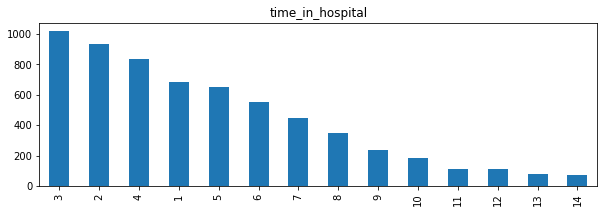

In [9]:
plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'time_in_hospital'].value_counts()[:25].plot(kind='bar')
plt.title("time_in_hospital")

Text(0.5, 1.0, 'medical_specialty')

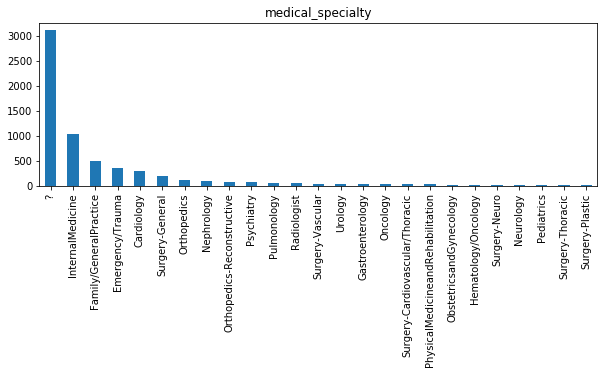

In [10]:
#plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'medical_specialty'].value_counts()[:25].plot(kind='bar')
plt.title("medical_specialty")

Text(0.5, 1.0, 'num_lab_procedures')

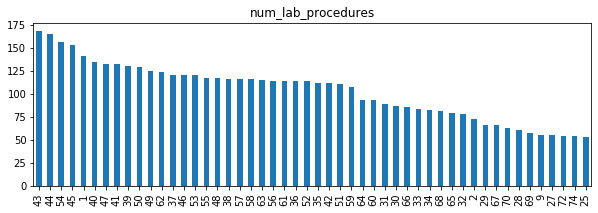

In [11]:
#plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'num_lab_procedures'].value_counts()[:50].plot(kind='bar')
plt.title("num_lab_procedures")

Text(0.5, 1.0, 'num_procedures')

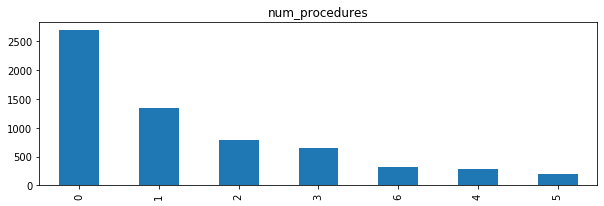

In [12]:
#plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'num_procedures'].value_counts().plot(kind='bar')
plt.title("num_procedures")

Text(0.5, 1.0, 'num_medications')

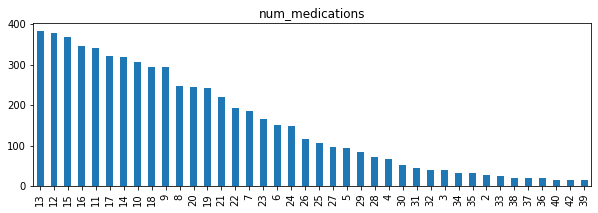

In [13]:
plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'num_medications'].value_counts()[:40].plot(kind='bar')
plt.title("num_medications")

Text(0.5, 1.0, 'number_emergency')

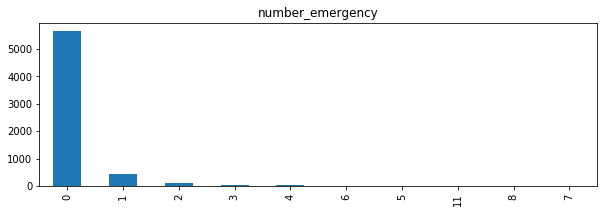

In [14]:
#plt.rcParams['figure.figsize']= [6.0, 4.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_emergency'].value_counts().plot(kind='bar')
plt.title("number_emergency")

Text(0.5, 1.0, 'number_inpatient')

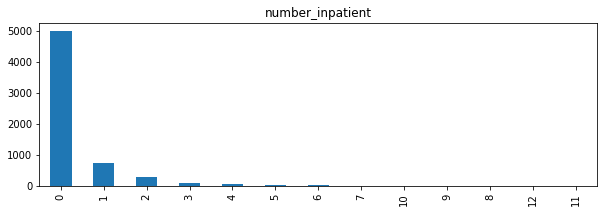

In [15]:
#plt.rcParams['figure.figsize']= [6.0, 4.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_inpatient'].value_counts().plot(kind='bar')
plt.title("number_inpatient")

Text(0.5, 1.0, 'number_outpatient')

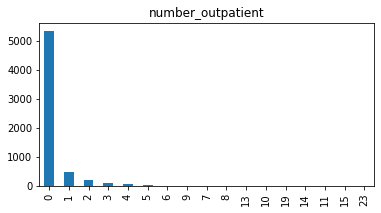

In [16]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_outpatient'].value_counts().plot(kind='bar')
plt.title("number_outpatient")

Text(0.5, 1.0, 'number_diagnoses')

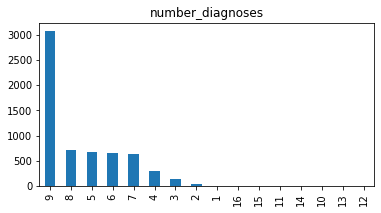

In [17]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_diagnoses'].value_counts().plot(kind='bar')
plt.title("number_diagnoses")

Text(0.5, 1.0, 'number_outpatient')

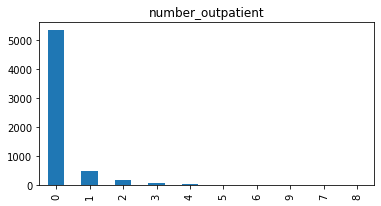

In [18]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_outpatient'].value_counts()[:10].plot(kind='bar')
plt.title("number_outpatient")

In [16]:
plt.rcParams['figure.figsize']= [8.0, 5.0]

#### Reduced Model

In [13]:
df,y, labl= get_data('diabetic_data.csv',labelEncode=True, skewness=True)

raw data shape (101766, 50)
['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
processed data shape: (69973, 42)


In [19]:
# reduced model 1

X=df[['discharge_disposition_id','number_inpatient','time_in_hospital']]
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, shuffle=False, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape)

enc = OneHotEncoder(categories='auto', sparse=True)
enc.fit(X)

lm = LogisticRegression(solver='saga', class_weight='balanced',max_iter=1000, C=0.1, penalty='l2', n_jobs=-1, random_state=42)
lm.fit(enc.transform(X_train), y_train)

y_pred_lm = lm.predict_proba(
    enc.transform(X_test))[:, 1]

fpr_lm, tpr_lm, _ = roc_curve(y_test, y_pred_lm)
auc_lm = auc(fpr_lm, tpr_lm)
print(auc_lm)



(46881, 3) (23092, 3)
0.6370133012183646


Text(0.5, 1.0, 'LR Model Coeficients')

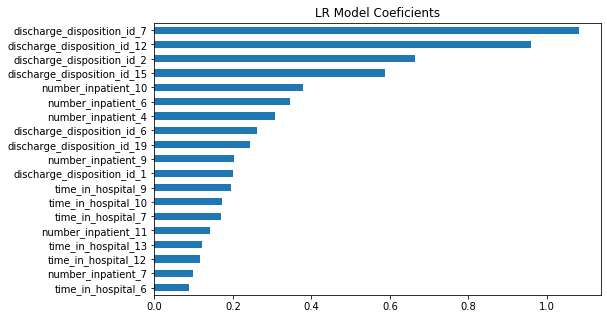

In [20]:
coefs = map_coef(lm, enc, X_train.columns, inverse_log=True)
pd.Series(coefs).sort_values().plot(kind='barh')
plt.title('LR Model Coeficients')

(array([  37., 2529., 9396., 3236., 3512., 2339.,  794.,  653.,  522.,
          74.]),
 array([0.25835109, 0.32412658, 0.38990207, 0.45567756, 0.52145305,
        0.58722854, 0.65300403, 0.71877952, 0.78455502, 0.85033051,
        0.916106  ]),
 <a list of 10 Patch objects>)

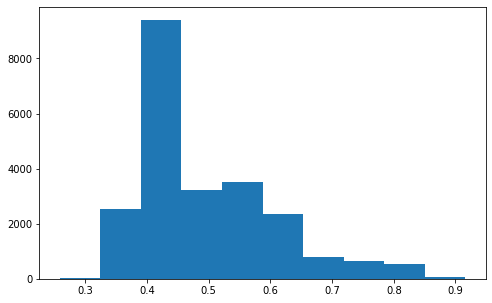

In [21]:
plt.hist(y_pred_lm, bins=10)

In [22]:
result = metrics_table(y_test, y_pred_lm)
result

,quantile,pop,readmitted,min_proba,max_proba,readmit_pct,avg_readmit,lift
0,0,2309,124,0.258351,0.369260,0.005370,0.092803,0.578628
1,1,2309,132,0.369260,0.398013,0.005716,0.092803,0.615959
2,2,2309,130,0.398013,0.400769,0.005630,0.092803,0.606626
3,3,2309,152,0.400769,0.408566,0.006582,0.092803,0.709286
4,4,2310,164,0.408566,0.452031,0.007102,0.092803,0.765282
5,5,2309,183,0.452031,0.474795,0.007925,0.092803,0.853943
6,6,2309,234,0.474795,0.536522,0.010133,0.092803,1.091927
7,7,2309,238,0.536522,0.579995,0.010307,0.092803,1.110593
8,8,2309,308,0.579995,0.635608,0.013338,0.092803,1.437238
9,9,2310,478,0.635608,0.916106,0.020700,0.092803,2.230518
